Assignment for Research and Development / AI

Name - Prajwal R

SRN - PES1UG22AM115


# Approach
The problem has one parametric curve, defined by two parametric equations - x(t) and y(t) - with three unknowns - theta, M and X (with respective lower and upper bounds).

A csv file with the list of points that lie on the curve for 6 < t < 60.

Based on the details given and my research, I will treat this as a parameter estimation problem and use global optimization to find/estimate the unknown values.

### Data Loading and Checking
Read the csv file and check for missing values.

In [8]:
import pandas as pd

data = pd.read_csv("xy_data.csv")

x_data = data['x'].values
y_data = data['y'].values
print(f"x shape: {x_data.shape}, y shape: {y_data.shape}")
print(data.isnull().sum())

x shape: (1500,), y shape: (1500,)
x    0
y    0
dtype: int64


No missing values.




### Data Visualization
Now plot the given points on a graph to visualise the curve.

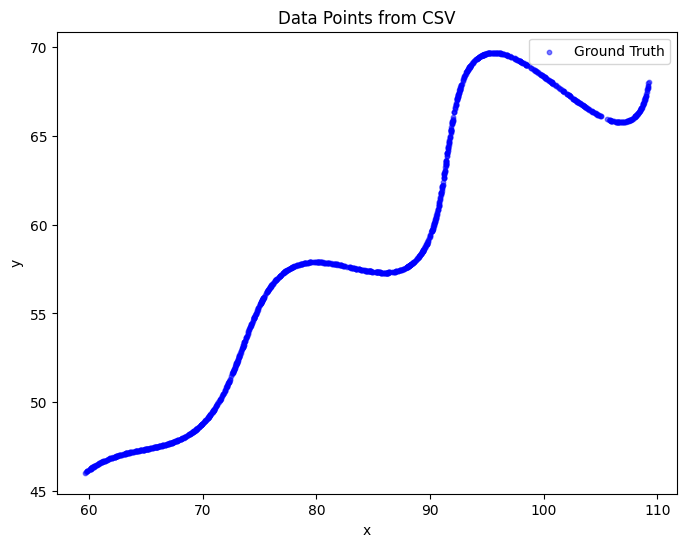

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, s=10, color='blue', alpha=0.5, label='Ground Truth')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data Points from CSV")
plt.legend()
plt.show()

### Assumptions

The values in the csv were calculated with actual values of theta, X and M with t ranging from 6 < t < 60. I will assume that the t values were equally spaced between 6 and 60.

So now I will split t into 1500 values equally spaced between 6 < t < 60.

In [10]:
import numpy as np

t = np.linspace(6, 60, len(x_data))
print(t.shape)

(1500,)


### Model Definition

In [11]:
def curve(t, theta, M, X):
    x = t * np.cos(theta) - np.exp(M*np.abs(t)) * np.sin(0.3*t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M*np.abs(t)) * np.sin(0.3*t) * np.cos(theta)
    return x, y


Compute the loss function between predicted and actual (x, y)

In [12]:
def l1_loss(params, t, x_data, y_data):
    theta, M, X = params
    x_pred, y_pred = curve(t, theta, M, X)
    l1_x = np.sum(np.abs(x_pred - x_data))
    l1_y = np.sum(np.abs(y_pred - y_data))
    return l1_x + l1_y

### Optimization and Results

I chose differential evolution as the optimizer as it is good for this type of problem.

In [13]:
from scipy.optimize import differential_evolution

# The variables have strict inequalities as bounds and cannot take values at the bounds so I will set the bounds slightly away from the limits.
# Example: If I define the bounds as X_bounds = (0, 100), then both 0 and 100 will be considered which is wrong as the variable X lies between 0 and 100

theta_bounds = (np.deg2rad(0.0001), np.deg2rad(49.9999)) 
M_bounds = (-0.04999, 0.04999)
X_bounds = (0.0001, 99.9999)

bounds = [theta_bounds, M_bounds, X_bounds]

result = differential_evolution(
    l1_loss,
    bounds,
    args=(t, x_data, y_data),
    strategy='best1bin',
    tol=1e-6,
    polish=True,
    seed=42
)

theta_opt, M_opt, X_opt = result.x
print(f"theta (rad): {theta_opt:.6f}")
print(f"theta (deg): {np.rad2deg(theta_opt):.6f}")
print(f"M: {M_opt:.6f}")
print(f"X: {X_opt:.6f}")

theta (rad): 0.490777
theta (deg): 28.119474
M: 0.021382
X: 54.902907


### Visualization of Fit

After finding the theta, M and X values, I substitute those values in the parametric equations with 1500 equally spaced t values and plot the new curve with actual curve to see how it overlaps/varies.

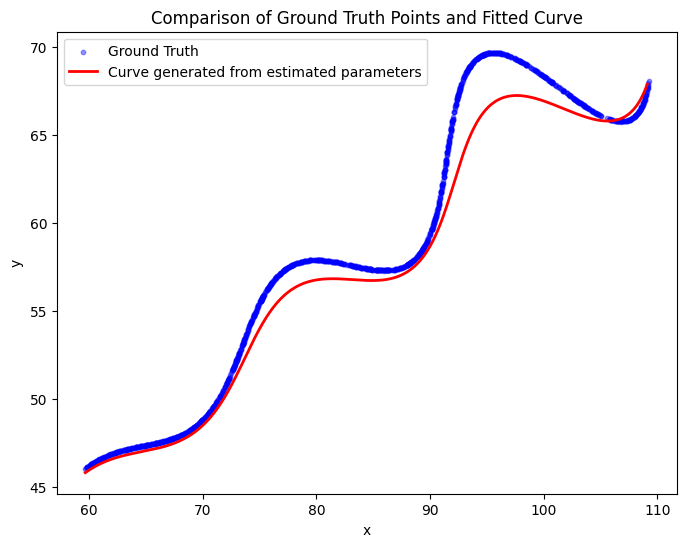

In [14]:
x_pred, y_pred = curve(t, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, s=10, color='blue', alpha=0.4, label='Ground Truth')
plt.plot(x_pred, y_pred, color='red', linewidth=2, label='Curve generated from estimated parameters')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Ground Truth Points and Fitted Curve")
plt.legend()
plt.show()

From the graph we can see that the estimated curve overlaps as well as deviates from the actual curve.
This is expected considering the assumtions I had made earlier.

I also tried different optimizers like L-BFGS-B, Powell, Dual Annealing, SHGO, Basinhopping and got similar results.

Refrences:

https://arunp77.medium.com/least-squares-curve-fitting-original-data-fitted-curve-and-residuals-5349f1b1c892

https://www.geeksforgeeks.org/data-science/curve-fitting-using-linear-and-nonlinear-regression/?utm_source=chatgpt.com